---

In [ ]:
# Importing and Selecting the kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"trymoren","key":"349f2781c72851c541d8d87592ff8c39"}'}

---

In [ ]:
# Move the uploaded json file to right directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

---

In [ ]:
# Installing Kaggle
!pip install kaggle

---

In [ ]:
# Downloading dataset from kaggle
!kaggle datasets download -d ethon0426/lending-club-20072020q1


Dataset URL: https://www.kaggle.com/datasets/ethon0426/lending-club-20072020q1
License(s): other
 99% 476M/482M [00:05<00:00, 74.3MB/s]
100% 482M/482M [00:05<00:00, 96.5MB/s]


---

In [ ]:
# Unzipping the dataset
!unzip lending-club-20072020q1.zip

Archive:  lending-club-20072020q1.zip
  inflating: LCDataDictionary.xlsx   
  inflating: Loan_status_2007-2020Q3.gzip  


---

In [ ]:
# Loading the data set
import pandas as pd
df = pd.read_csv('Loan_status_2007-2020Q3.gzip', nrows=7*10**5, low_memory=False)

---

In [ ]:
# Checking the shape of the data set
df=df[:50000]

In [ ]:
df.shape

(50000, 142)

---

In [ ]:
# First five rows
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


---

In [ ]:
# drop redundant and non useful columns from the data set
df.drop(columns=['Unnamed: 0','grade', 'sub_grade','id','orig_projected_additional_accrued_interest'], inplace=True)

In [ ]:
df.drop(columns=['url','zip_code','title','emp_title','inq_fi','mths_since_recent_inq', 'inq_last_6mths',"addr_state"], inplace=True)

In [ ]:
df.drop(columns=['initial_list_status',
                 'chargeoff_within_12_mths', 'tax_liens', 'policy_code', 'num_tl_120dpd_2m', 'num_tl_30dpd',
                 'num_tl_90g_dpd_24m', 'pymnt_plan', 'acc_now_delinq', 'debt_settlement_flag', 'delinq_amnt',
                 'issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d',
                ], inplace=True)

In [ ]:
df.drop(columns=['funded_amnt', 'funded_amnt_inv', 'out_prncp', 'out_prncp_inv', 'last_fico_range_low',
                 'last_fico_range_high','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','tot_coll_amt','last_pymnt_amnt',
                 'total_il_high_credit_limit', 'hardship_flag', 'installment',
                 'revol_util','collections_12_mths_ex_med'],
                inplace=True)

-----

In [ ]:
# Calculate the null percentage for each column
null_percentages = df.isnull().mean() * 100

# Filter columns with 50% or more null values
columns_with_high_nulls = null_percentages[null_percentages >= 50]
# Drop the identified columns
df_cleaned = df.drop(columns=columns_with_high_nulls.index)
# Sort columns by null percentage in descending order
sorted_columns = columns_with_high_nulls.sort_values(ascending=False)

# Print the result
print(sorted_columns)

revol_bal_joint                       100.000
open_rv_12m                           100.000
sec_app_collections_12_mths_ex_med    100.000
sec_app_chargeoff_within_12_mths      100.000
sec_app_num_rev_accts                 100.000
                                       ...   
num_sats                               85.072
num_tl_op_past_12m                     85.072
pct_tl_nvr_dlq                         85.072
tot_hi_cred_lim                        85.072
mths_since_last_delinq                 61.648
Length: 75, dtype: float64


---

In [ ]:
# Now df_filtered contains only the columns with less than 50% non-null values
df_cleaned

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,total_acc,application_type,pub_rec_bankruptcies
0,5000.0,36 months,10.65%,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,735.0,739.0,3.0,0.0,13648.0,9.0,Individual,0.0
1,2500.0,60 months,15.27%,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,740.0,744.0,3.0,0.0,1687.0,4.0,Individual,0.0
2,2400.0,36 months,15.96%,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0.0,735.0,739.0,2.0,0.0,2956.0,10.0,Individual,0.0
3,10000.0,36 months,13.49%,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0.0,690.0,694.0,10.0,0.0,5598.0,37.0,Individual,0.0
4,3000.0,60 months,12.69%,1 year,RENT,80000.0,Source Verified,Fully Paid,other,17.94,0.0,695.0,699.0,15.0,0.0,27783.0,38.0,Individual,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,30000.0,60 months,14.47%,5 years,MORTGAGE,155000.0,Verified,Fully Paid,debt_consolidation,13.75,0.0,710.0,714.0,10.0,0.0,13599.0,31.0,Individual,0.0
49996,21000.0,60 months,15.61%,NaN,RENT,54000.0,Verified,Fully Paid,credit_card,22.84,1.0,670.0,674.0,16.0,0.0,7043.0,24.0,Individual,0.0
49997,3000.0,36 months,13.98%,10+ years,MORTGAGE,68000.0,Not Verified,Fully Paid,home_improvement,16.06,0.0,690.0,694.0,10.0,0.0,5213.0,15.0,Individual,0.0
49998,35000.0,36 months,10.99%,10+ years,MORTGAGE,300000.0,Source Verified,Fully Paid,debt_consolidation,3.31,0.0,725.0,729.0,8.0,0.0,113172.0,34.0,Individual,0.0


In [ ]:
df_cleaned["loan_status"].value_counts()

loan_status
Fully Paid                                             40414
Charged Off                                             6836
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: count, dtype: int64

In [ ]:
df_cleaned["int_rate"].value_counts()

int_rate
 10.99%    1368
 11.99%    1018
  7.90%     880
 11.49%     837
 13.49%     832
           ... 
 17.41%       1
 16.83%       1
 17.46%       1
 17.72%       1
 16.20%       1
Name: count, Length: 419, dtype: int64

In [ ]:
df_cleaned['int_rate'] = df_cleaned['int_rate'].str.replace('%', '')
df_cleaned['int_rate'] = pd.to_numeric(df_cleaned['int_rate'])
df_cleaned['int_rate'] = df_cleaned['int_rate'] / 100

In [ ]:
df_cleaned['term'] = df_cleaned['term'].str.replace('months', '')
df_cleaned['term'] = pd.to_numeric(df_cleaned['term'])


In [ ]:
#df_cleaned['int_rate'] = df_cleaned['int_rate'].astype(str).str.rstrip('%').astype(float) / 100

In [ ]:
df_cleaned['emp_length'] = df_cleaned['emp_length'].replace('< 1 year', 0)
# df_cleaned['emp_length'] = df_cleaned['emp_length'].replace('10+ years', 10)
# df_cleaned['emp_length'] = df_cleaned['emp_length'].replace('5 years', 5)


In [ ]:
import re

df_cleaned['emp_length'] = df_cleaned['emp_length'].str.extract('(\d+)', expand=False)


In [ ]:
df_cleaned['emp_length'] = df_cleaned['emp_length'].fillna(df_cleaned['emp_length'].mode()[0])
df_cleaned['emp_length'] = pd.to_numeric(df_cleaned['emp_length'])


---

In [ ]:
# import pandas as pd

# # Fill NaN values in the 'term' column with a placeholder value, e.g., -1
# df_cleaned['term'] = df_cleaned['term'].fillna(-1)
# df_cleaned['emp_length'] = df_cleaned['emp_length'].fillna(-1)

# # Convert the 'term' column to string, extract the digits, and then convert to integer
# df_cleaned['term'] = df_cleaned['term'].astype(str).str.extract(r'(\d+)').astype(int)

# # Convert the 'emp_length' and 'int_rate' column to string, extract the digits, and then convert to integer
# df_cleaned['emp_length'] = df_cleaned['emp_length'].astype(str).str.extract(r'(\d+)').astype(float).astype(int)

# df_cleaned['int_rate'] = df_cleaned['int_rate'].astype(str).str.rstrip('%').astype(float) / 100

---

In [ ]:
# # Find the mode of the 'term' column
# term_mode = df_cleaned['term'].mode()[0]

# # Replace -1 values in the 'term' column with the mode
# df_cleaned.loc[df_cleaned['term'] == -1, 'term'] = term_mode

# # Find the mode of the 'emp_length' column
# emp_length_mode = df_cleaned['emp_length'].mode()[0]

# # Replace -1 values in the 'emp_length' column with the mode
# df_cleaned.loc[df_cleaned['emp_length'] == -1, 'emp_length'] = emp_length_mode


---

In [ ]:
# Checking columns
df_cleaned

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,total_acc,application_type,pub_rec_bankruptcies
0,5000.0,36.0,0.1065,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,735.0,739.0,3.0,0.0,13648.0,9.0,Individual,0.0
1,2500.0,60.0,0.1527,10,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,740.0,744.0,3.0,0.0,1687.0,4.0,Individual,0.0
2,2400.0,36.0,0.1596,10,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0.0,735.0,739.0,2.0,0.0,2956.0,10.0,Individual,0.0
3,10000.0,36.0,0.1349,10,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0.0,690.0,694.0,10.0,0.0,5598.0,37.0,Individual,0.0
4,3000.0,60.0,0.1269,1,RENT,80000.0,Source Verified,Fully Paid,other,17.94,0.0,695.0,699.0,15.0,0.0,27783.0,38.0,Individual,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,30000.0,60.0,0.1447,5,MORTGAGE,155000.0,Verified,Fully Paid,debt_consolidation,13.75,0.0,710.0,714.0,10.0,0.0,13599.0,31.0,Individual,0.0
49996,21000.0,60.0,0.1561,10,RENT,54000.0,Verified,Fully Paid,credit_card,22.84,1.0,670.0,674.0,16.0,0.0,7043.0,24.0,Individual,0.0
49997,3000.0,36.0,0.1398,10,MORTGAGE,68000.0,Not Verified,Fully Paid,home_improvement,16.06,0.0,690.0,694.0,10.0,0.0,5213.0,15.0,Individual,0.0
49998,35000.0,36.0,0.1099,10,MORTGAGE,300000.0,Source Verified,Fully Paid,debt_consolidation,3.31,0.0,725.0,729.0,8.0,0.0,113172.0,34.0,Individual,0.0


---

In [ ]:
# Printing Categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['home_ownership', 'verification_status', 'loan_status', 'purpose',
       'application_type'],
      dtype='object')


---

In [ ]:
# Convert classes in loan_status to positive class (1) and negative class (0)
df_cleaned = df_cleaned.replace({"loan_status":{ "Fully Paid": 0, "Charged Off": 1}})

In [ ]:
df_cleaned

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,total_acc,application_type,pub_rec_bankruptcies
0,5000.0,36.0,0.1065,10,RENT,24000.0,Verified,0,credit_card,27.65,0.0,735.0,739.0,3.0,0.0,13648.0,9.0,Individual,0.0
1,2500.0,60.0,0.1527,10,RENT,30000.0,Source Verified,1,car,1.00,0.0,740.0,744.0,3.0,0.0,1687.0,4.0,Individual,0.0
2,2400.0,36.0,0.1596,10,RENT,12252.0,Not Verified,0,small_business,8.72,0.0,735.0,739.0,2.0,0.0,2956.0,10.0,Individual,0.0
3,10000.0,36.0,0.1349,10,RENT,49200.0,Source Verified,0,other,20.00,0.0,690.0,694.0,10.0,0.0,5598.0,37.0,Individual,0.0
4,3000.0,60.0,0.1269,1,RENT,80000.0,Source Verified,0,other,17.94,0.0,695.0,699.0,15.0,0.0,27783.0,38.0,Individual,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,30000.0,60.0,0.1447,5,MORTGAGE,155000.0,Verified,0,debt_consolidation,13.75,0.0,710.0,714.0,10.0,0.0,13599.0,31.0,Individual,0.0
49996,21000.0,60.0,0.1561,10,RENT,54000.0,Verified,0,credit_card,22.84,1.0,670.0,674.0,16.0,0.0,7043.0,24.0,Individual,0.0
49997,3000.0,36.0,0.1398,10,MORTGAGE,68000.0,Not Verified,0,home_improvement,16.06,0.0,690.0,694.0,10.0,0.0,5213.0,15.0,Individual,0.0
49998,35000.0,36.0,0.1099,10,MORTGAGE,300000.0,Source Verified,0,debt_consolidation,3.31,0.0,725.0,729.0,8.0,0.0,113172.0,34.0,Individual,0.0


In [ ]:
df_cleaned["loan_status"].value_counts()

loan_status
0                                                      40414
1                                                       6836
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: count, dtype: int64

---

In [ ]:
# Filter rows with loan_status column containing 0 and 1 only
df_filtered = df_cleaned[df_cleaned['loan_status'].isin([0, 1])]
df_filtered

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,total_acc,application_type,pub_rec_bankruptcies
0,5000.0,36.0,0.1065,10,RENT,24000.0,Verified,0,credit_card,27.65,0.0,735.0,739.0,3.0,0.0,13648.0,9.0,Individual,0.0
1,2500.0,60.0,0.1527,10,RENT,30000.0,Source Verified,1,car,1.00,0.0,740.0,744.0,3.0,0.0,1687.0,4.0,Individual,0.0
2,2400.0,36.0,0.1596,10,RENT,12252.0,Not Verified,0,small_business,8.72,0.0,735.0,739.0,2.0,0.0,2956.0,10.0,Individual,0.0
3,10000.0,36.0,0.1349,10,RENT,49200.0,Source Verified,0,other,20.00,0.0,690.0,694.0,10.0,0.0,5598.0,37.0,Individual,0.0
4,3000.0,60.0,0.1269,1,RENT,80000.0,Source Verified,0,other,17.94,0.0,695.0,699.0,15.0,0.0,27783.0,38.0,Individual,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,30000.0,60.0,0.1447,5,MORTGAGE,155000.0,Verified,0,debt_consolidation,13.75,0.0,710.0,714.0,10.0,0.0,13599.0,31.0,Individual,0.0
49996,21000.0,60.0,0.1561,10,RENT,54000.0,Verified,0,credit_card,22.84,1.0,670.0,674.0,16.0,0.0,7043.0,24.0,Individual,0.0
49997,3000.0,36.0,0.1398,10,MORTGAGE,68000.0,Not Verified,0,home_improvement,16.06,0.0,690.0,694.0,10.0,0.0,5213.0,15.0,Individual,0.0
49998,35000.0,36.0,0.1099,10,MORTGAGE,300000.0,Source Verified,0,debt_consolidation,3.31,0.0,725.0,729.0,8.0,0.0,113172.0,34.0,Individual,0.0


In [ ]:
df_filtered["loan_status"].value_counts()

loan_status
0    40414
1     6836
Name: count, dtype: int64

---

In [ ]:
# One-hot encoding with Pandas: setting the dummies and dropping the first dummy variable
categorical_columns=['application_type','purpose','verification_status','home_ownership']

# one-hot encoding with drop_first=True
df_encoded = pd.get_dummies(df_filtered, columns=categorical_columns, drop_first=True, dtype=int)
df_encoded.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,fico_range_high,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000.0,36.0,0.1065,10,24000.0,0,27.65,0.0,735.0,739.0,...,0,0,0,0,0,1,0,0,0,1
1,2500.0,60.0,0.1527,10,30000.0,1,1.00,0.0,740.0,744.0,...,0,0,0,0,1,0,0,0,0,1
2,2400.0,36.0,0.1596,10,12252.0,0,8.72,0.0,735.0,739.0,...,0,1,0,0,0,0,0,0,0,1
3,10000.0,36.0,0.1349,10,49200.0,0,20.00,0.0,690.0,694.0,...,0,0,0,0,1,0,0,0,0,1
4,3000.0,60.0,0.1269,1,80000.0,0,17.94,0.0,695.0,699.0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
# check the types of each attribute
df_encoded.dtypes.sort_values()

purpose_debt_consolidation               int64
home_ownership_OTHER                     int64
home_ownership_NONE                      int64
verification_status_Verified             int64
verification_status_Source Verified      int64
purpose_wedding                          int64
purpose_vacation                         int64
purpose_small_business                   int64
purpose_renewable_energy                 int64
purpose_other                            int64
purpose_moving                           int64
purpose_medical                          int64
purpose_major_purchase                   int64
purpose_house                            int64
purpose_home_improvement                 int64
purpose_educational                      int64
home_ownership_RENT                      int64
purpose_credit_card                      int64
emp_length                               int64
home_ownership_OWN                       int64
term                                   float64
int_rate     

----

In [ ]:
# Printing Categorical columns
categorical_columns = df_encoded.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['loan_status'], dtype='object')


---

In [ ]:
#Checking and removing extreme values
df1 = df_encoded.copy()

for i in [i for i in df1.columns]:
    if df1[i].nunique()>=12:
        Q1 = df1[i].quantile(0.25)
        Q3 = df1[i].quantile(0.75)
        IQR = Q3 - Q1
        df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
        df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(df.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,loan_amnt,term,int_rate,emp_length,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,fico_range_high,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000.0,36.0,0.1065,10,24000.0,0,27.65,0.0,735.0,739.0,...,0,0,0,0,0,1,0,0,0,1
1,2500.0,60.0,0.1527,10,30000.0,1,1.00,0.0,740.0,744.0,...,0,0,0,0,1,0,0,0,0,1
2,2400.0,36.0,0.1596,10,12252.0,0,8.72,0.0,735.0,739.0,...,0,1,0,0,0,0,0,0,0,1
3,10000.0,36.0,0.1349,10,49200.0,0,20.00,0.0,690.0,694.0,...,0,0,0,0,1,0,0,0,0,1
4,3000.0,60.0,0.1269,1,80000.0,0,17.94,0.0,695.0,699.0,...,0,0,0,0,1,0,0,0,0,1



Inference: Before removal of outliers, The dataset had 50000 samples.
Inference: After removal of outliers, The dataset now has 35162 samples.


---

In [ ]:
# Check for constant features
constant_features = df_encoded.nunique() == 1
print("\nConstant Features:")
print(constant_features)


Constant Features:
loan_amnt                              False
term                                   False
int_rate                               False
emp_length                             False
annual_inc                             False
loan_status                            False
dti                                    False
delinq_2yrs                            False
fico_range_low                         False
fico_range_high                        False
open_acc                               False
pub_rec                                False
revol_bal                              False
total_acc                              False
pub_rec_bankruptcies                   False
purpose_credit_card                    False
purpose_debt_consolidation             False
purpose_educational                    False
purpose_home_improvement               False
purpose_house                          False
purpose_major_purchase                 False
purpose_medical                    

---

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Flatten the correlation matrix, excluding the diagonal and duplicate values
correlation_pairs = correlation_matrix.unstack()
correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]

# Create a DataFrame to store correlated feature pairs and their correlation values
correlation_df = pd.DataFrame({
    'Feature 1': correlation_pairs.index.get_level_values(0),
    'Feature 2': correlation_pairs.index.get_level_values(1),
    'Correlation': correlation_pairs.values
})

# Filter rows with correlation greater than 0.7
filtered_correlation_df = correlation_df[correlation_df['Correlation'] > 0.7]

# Sort the filtered DataFrame based on correlation values in descending order
sorted_filtered_correlation_df = filtered_correlation_df.sort_values(by='Correlation', ascending=False)

# Print the sorted and filtered correlated features
print(sorted_filtered_correlation_df)


                Feature 1             Feature 2  Correlation
272        fico_range_low       fico_range_high     1.000000
305       fico_range_high        fico_range_low     1.000000
376               pub_rec  pub_rec_bankruptcies     0.775826
473  pub_rec_bankruptcies               pub_rec     0.775826


In [ ]:
# Identify highly correlated features
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Create a new DataFrame with selected features
selected_features_df = df_encoded.copy()  # Make a copy
selected_features_df = selected_features_df.drop(correlated_features, axis=1)


---

In [ ]:
selected_features_df.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,open_acc,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000.0,36.0,0.1065,10,24000.0,0,27.65,0.0,735.0,3.0,...,0,0,0,0,0,1,0,0,0,1
1,2500.0,60.0,0.1527,10,30000.0,1,1.00,0.0,740.0,3.0,...,0,0,0,0,1,0,0,0,0,1
2,2400.0,36.0,0.1596,10,12252.0,0,8.72,0.0,735.0,2.0,...,0,1,0,0,0,0,0,0,0,1
3,10000.0,36.0,0.1349,10,49200.0,0,20.00,0.0,690.0,10.0,...,0,0,0,0,1,0,0,0,0,1
4,3000.0,60.0,0.1269,1,80000.0,0,17.94,0.0,695.0,15.0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
# Printing Categorical columns
categorical_columns = selected_features_df.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['loan_status'], dtype='object')


In [ ]:
# Printing Categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['term', 'int_rate', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'next_pymnt_d',
       'application_type', 'verification_status_joint',
       'sec_app_earliest_cr_line', 'hardship_type', 'hardship_reason',
       'hardship_status', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_loan_status'],
      dtype='object')


---

In [ ]:
# Calculate the mode of each column
mode_values = selected_features_df.mode().iloc[0]

# Fill missing values in each column with the respective mode
df_filled = selected_features_df.fillna(mode_values)

---

In [ ]:
# Import libries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Specifying target variable
target_variable = 'loan_status'

# Extract features and target variable
X = df_filled.drop(target_variable, axis=1)
y = df_filled[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((37800, 31), (37800,), (9450, 31), (9450,))

---

In [ ]:
import numpy as np
# Convert data to save memory
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.int8)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Instantiate and fit the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, logreg_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression Train_Accuracy:", train_accuracy)
print("Logistic Regression Test_Accuracy:", test_accuracy)

Logistic Regression Train_Accuracy: 0.8554232804232804
Logistic Regression Test_Accuracy: 0.8534391534391534


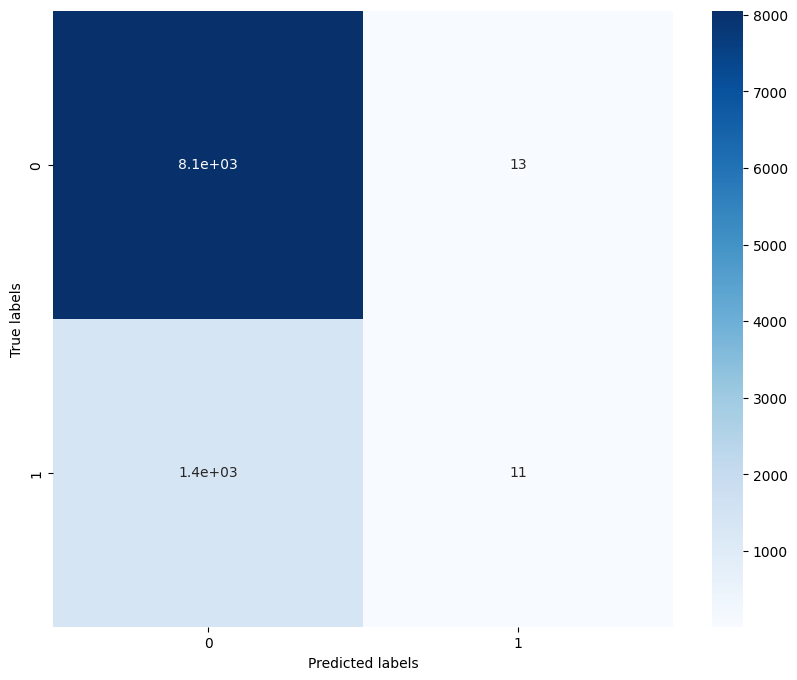

In [ ]:
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [ ]:
# Print all metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8067
           1       0.46      0.01      0.02      1383

    accuracy                           0.85      9450
   macro avg       0.66      0.50      0.47      9450
weighted avg       0.80      0.85      0.79      9450



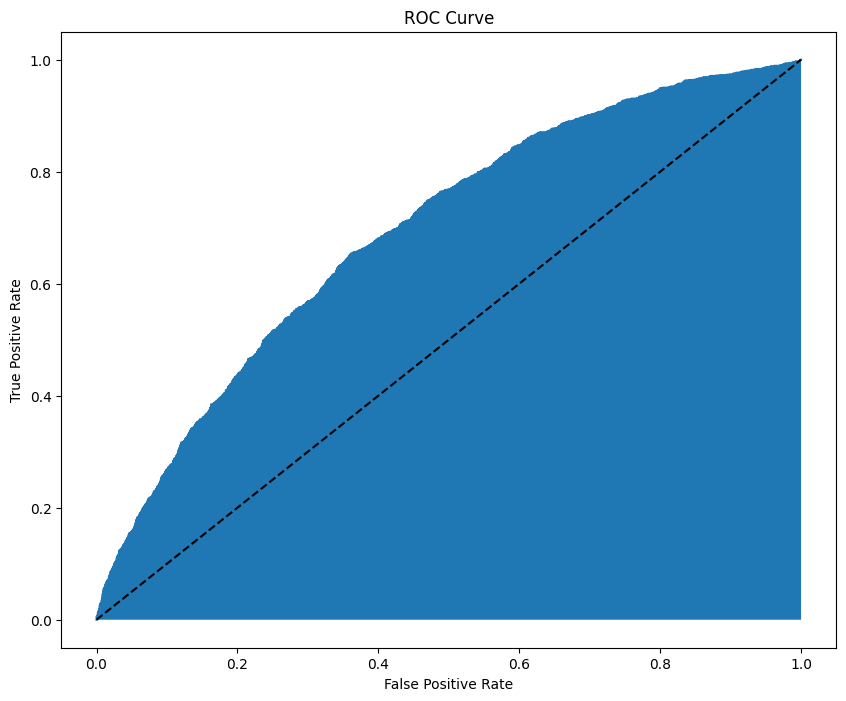

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Make predictions
y_pred = logreg_model.predict(X_test)
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]


# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.fill_between(fpr, tpr, alpha=1)  # Add fill between curve and x-axis
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



**All in One**

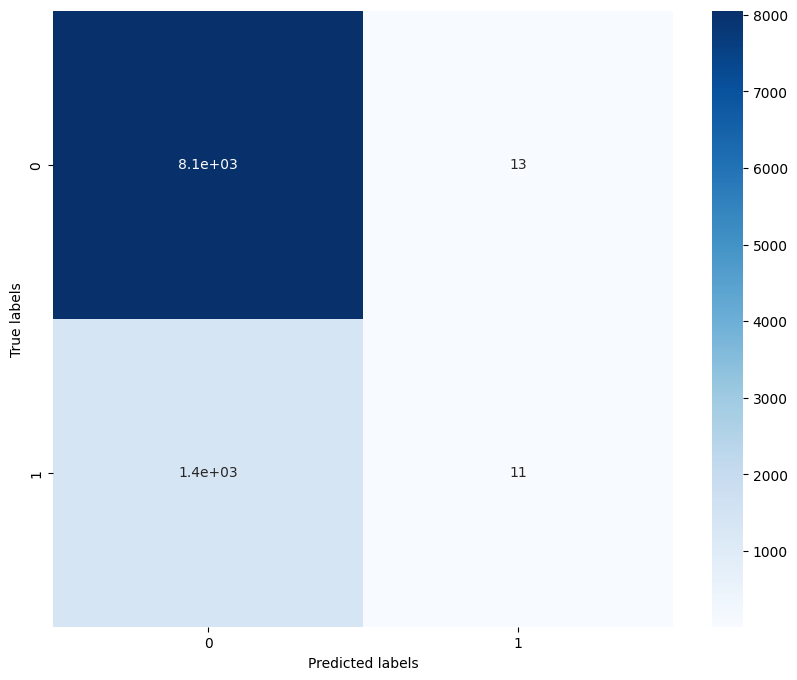

Logistic Regression Train_Accuracy: 0.8554232804232804
Logistic Regression Test_Accuracy: 0.8534391534391534
Confusion Matrix:
[[8054   13]
 [1372   11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8067
           1       0.46      0.01      0.02      1383

    accuracy                           0.85      9450
   macro avg       0.66      0.50      0.47      9450
weighted avg       0.80      0.85      0.79      9450



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate and fit the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, logreg_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Print all metrics
print("Logistic Regression Train_Accuracy:", train_accuracy)
print("Logistic Regression Test_Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(conf_mat)
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Instantiate and fit the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, xgb_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print("XGBoost Train_Accuracy:", train_accuracy)
print("XGBoost Test_Accuracy:", test_accuracy)

XGBoost Train_Accuracy: 0.8863492063492063
XGBoost Test_Accuracy: 0.8467724867724867


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate and fit the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print("Random Forest Train_Accuracy:", train_accuracy)
print("Random Forest Test_Accuracy:", test_accuracy)

Random Forest Train_Accuracy: 1.0
Random Forest Test_Accuracy: 0.8539682539682539


- **Logistic Regression:** The model shows good performance on both the training and test sets. However, the performance is slightly lower than XGBoost.

- **XGBoost:** This model performs slightly better than Logistic Regression on both the training and test sets. It has a slightly higher accuracy on the test set compared to Logistic Regression.

- **Random Forest:** A train accuracy close to 1.0 and a test accuracy of 0.8, shows signs of overfitting.

- We shall take **Logistic regression** and **XGBoost** for further analysis

---

**More Detailed visuals**

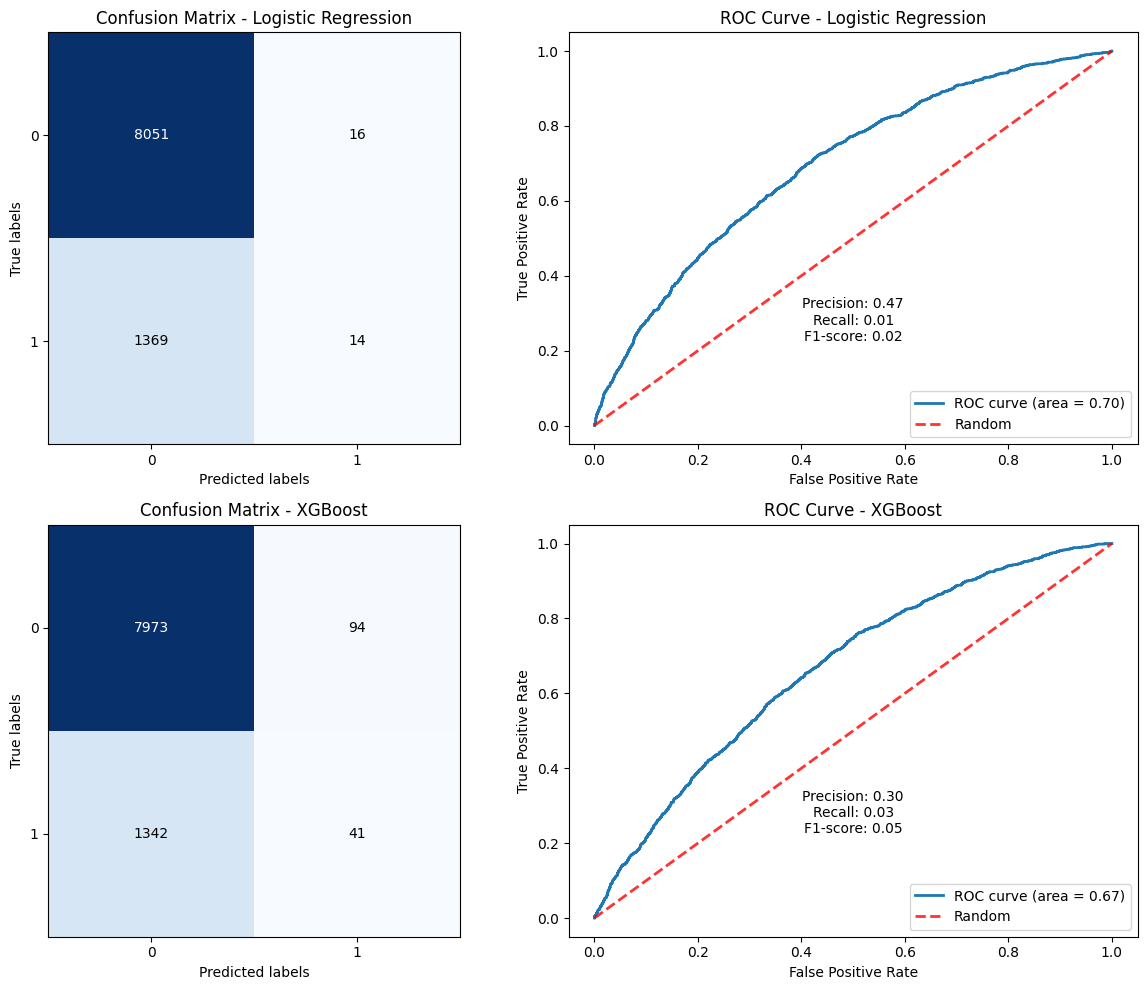

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Create subplots for confusion matrices and ROC curves
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Confusion Matrix, ROC curve, Precision, Recall, F1-score for Logistic Regression
ax1 = axes[0, 0]
ax2 = axes[0, 1]

# Generate confusion matrix for Logistic Regression
logistic_cm = confusion_matrix(y_test, logreg_model.predict(X_test))
ax1.imshow(logistic_cm, cmap=plt.cm.Blues, interpolation='nearest')
ax1.set_title('Confusion Matrix - Logistic Regression')
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_xticks(range(len(logistic_cm)))
ax1.set_yticks(range(len(logistic_cm)))
for i in range(len(logistic_cm)):
    for j in range(len(logistic_cm)):
        ax1.text(j, i, format(logistic_cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if logistic_cm[i, j] > logistic_cm.max() / 2. else "black")

# Generate ROC curve for Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, logreg_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
ax2.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
ax2.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)
ax2.set_xlim([-0.05, 1.05])
ax2.set_ylim([-0.05, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve - Logistic Regression')
ax2.legend(loc="lower right")

# Calculate precision, recall, and f1-score for Logistic Regression
y_pred_logistic = logreg_model.predict(X_test)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

# Display precision, recall, and f1-score for Logistic Regression
ax2.text(0.5, 0.3, f'Precision: {precision_logistic:.2f}\nRecall: {recall_logistic:.2f}\nF1-score: {f1_logistic:.2f}',
         fontsize=10, ha='center', va='center', transform=ax2.transAxes)

# Confusion Matrix, ROC curve, Precision, Recall, F1-score for XGBoost
ax3 = axes[1, 0]
ax4 = axes[1, 1]

# Generate confusion matrix for XGBoost
xgb_cm = confusion_matrix(y_test, xgb_model.predict(X_test))
ax3.imshow(xgb_cm, cmap=plt.cm.Blues, interpolation='nearest')
ax3.set_title('Confusion Matrix - XGBoost')
ax3.set_xlabel('Predicted labels')
ax3.set_ylabel('True labels')
ax3.set_xticks(range(len(xgb_cm)))
ax3.set_yticks(range(len(xgb_cm)))
for i in range(len(xgb_cm)):
    for j in range(len(xgb_cm)):
        ax3.text(j, i, format(xgb_cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if xgb_cm[i, j] > xgb_cm.max() / 2. else "black")

# Generate ROC curve for XGBoost
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
ax4.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
ax4.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)
ax4.set_xlim([-0.05, 1.05])
ax4.set_ylim([-0.05, 1.05])
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('ROC Curve - XGBoost')
ax4.legend(loc="lower right")

# Calculate precision, recall, and f1-score for XGBoost
y_pred_xgb = xgb_model.predict(X_test)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Display precision, recall, and f1-score for XGBoost
ax4.text(0.5, 0.3, f'Precision: {precision_xgb:.2f}\nRecall: {recall_xgb:.2f}\nF1-score: {f1_xgb:.2f}',
         fontsize=10, ha='center', va='center', transform=ax4.transAxes)

plt.tight_layout()
plt.show()

- Based on the provided metrics, XGBoost outperforms Logistic Regression in terms of precision, recall, and F1-score, while having a similar AUC.
- XGBoost seems to be the better model overall.

---

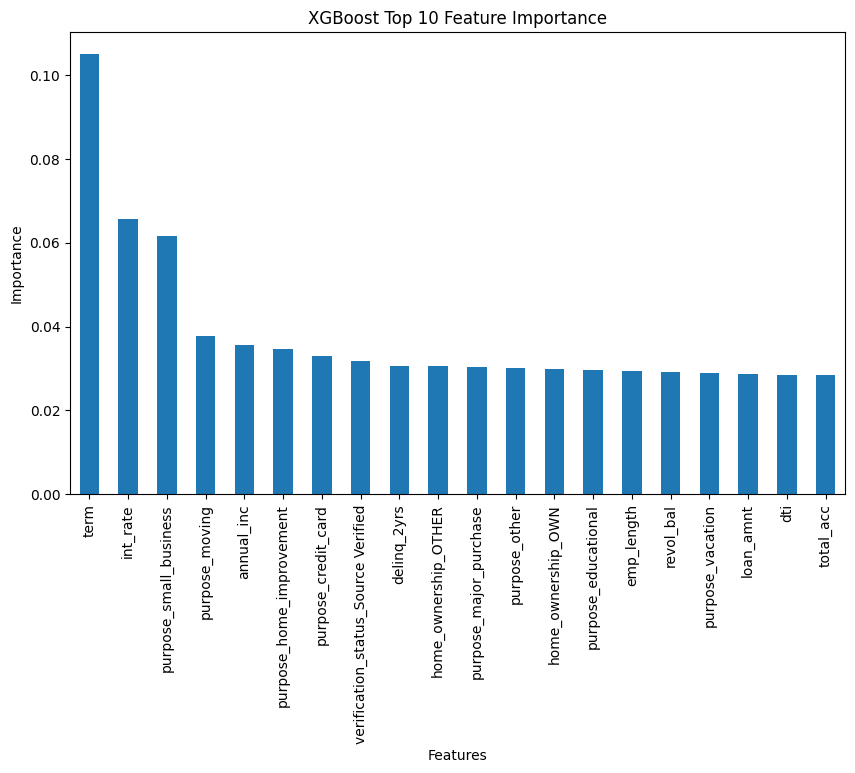

In [ ]:
# Get feature importances
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns)

# Sort feature importances in descending order
sorted_feature_importance_xgb = feature_importance_xgb.nlargest(20)

# Plot feature importances
plt.figure(figsize=(10, 6))
sorted_feature_importance_xgb.plot(kind='bar')
plt.title('XGBoost Top 10 Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


- int_rate** and **term** have the highest importance, indicating that they significantly influence the model’s predictions.
- Other features like **max_bal_bc**, **purpose_small_business**, and **home_ownership_MORTGAGE** also contribute to the model’s performance but to a lesser extent.
- Many other features have minimal influence on the model, as indicated by their low feature importance values.

---

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.4 MB/s eta 0:00:00


100%|===================| 9408/9450 [00:57<00:00]       

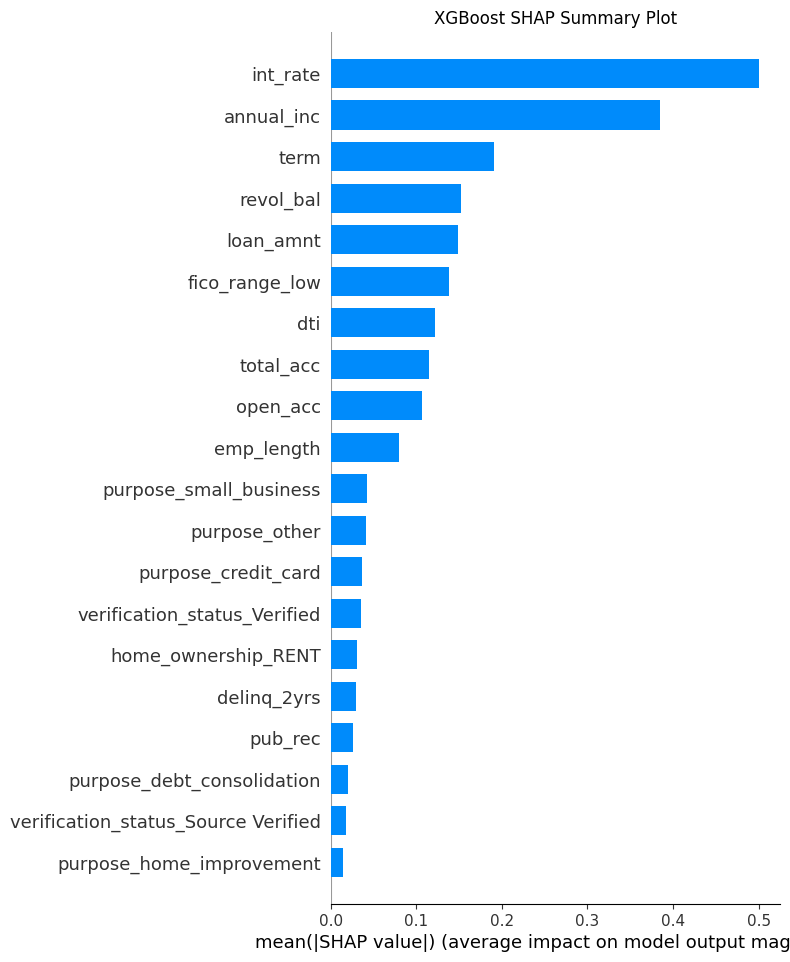

In [ ]:
import shap
# Create a SHAP explainer object
explainer_xgb = shap.Explainer(xgb_model, X_train)

# Calculate SHAP values
shap_values_xgb = explainer_xgb.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values_xgb, X_test, feature_names=X.columns,plot_type="bar", show=False)
plt.title('XGBoost SHAP Summary Plot')
plt.show()


- int_rate** and **term** continue to lead on SHAP summary plot.

---

 99%|===================| 46957/47250 [01:20<00:00]       

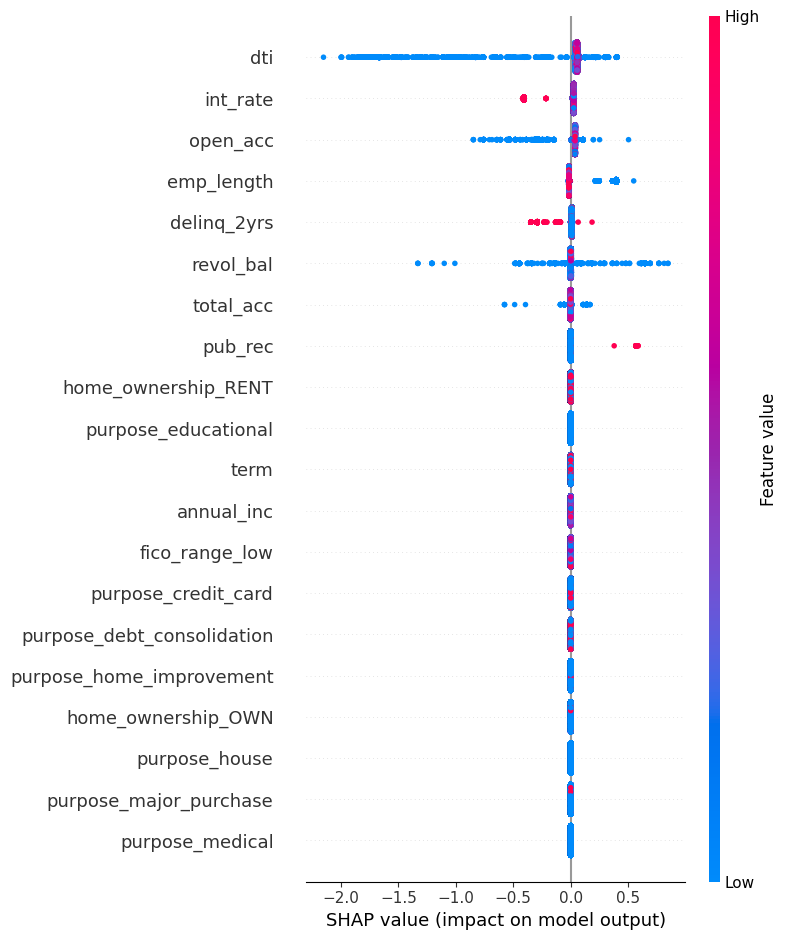

In [ ]:
# Create a SHAP explainer object
explainer = shap.Explainer(xgb_model, X)

# Calculate SHAP values
shap_values = explainer.shap_values(X)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X)


---